A table of nodes and values is given:

| node | values |
| :-: | :-: |
| 0 | 0.3 |
| 3 | 0.025 |
| 6 | 0.003 |
| 9 | 0.00008 |
| 12 | 0.0000032 |

Find a generalized polynomial that interpolates the data using an appropriate basis.
Illustrate the solution graphically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nodes = np.array([0, 3, 6, 9, 12])
values = np.array([0.3, 0.025, 0.003, 0.00008, 0.0000032])

n = nodes.size

In [3]:
def basis_poly(x, basis):
    matrix = np.ones([n, n])
    
    for row in range(n):
        for column in range(n):
            matrix[row, column] = basis(column, nodes[row])
        
    vector_column = np.linalg.solve(matrix, values)

    return sum(vector_column[i] * basis(i, x) for i in range(vector_column.size))

In [4]:
x_axis = np.linspace(nodes.min(), nodes.max(), 400)

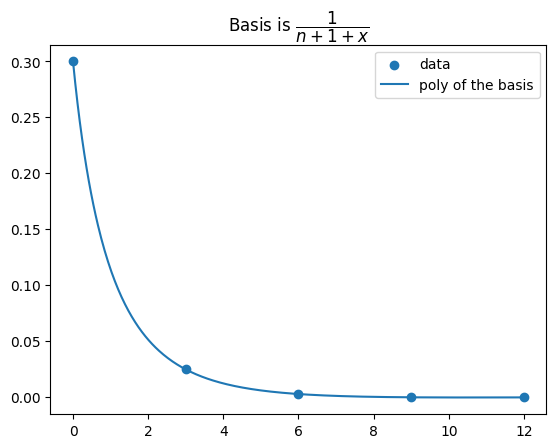

In [5]:
plt.scatter(nodes, values)
plt.plot(x_axis, basis_poly(x_axis, basis=lambda n, x: 1 / (n + x + 1)))
plt.title('Basis is $\\dfrac{1}{n+1+x}$')
plt.legend(['data', 'poly of the basis'])
plt.show()

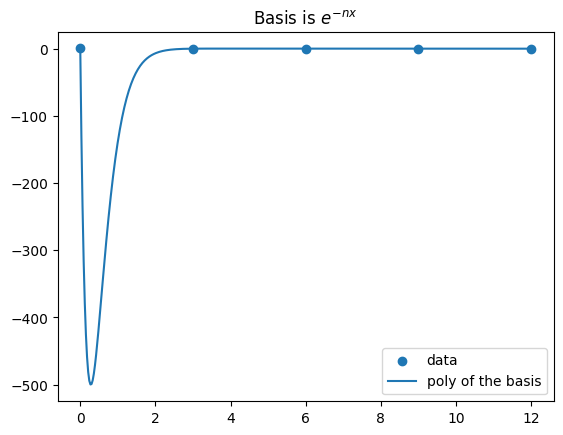

In [6]:
plt.scatter(nodes, values)
plt.plot(x_axis, basis_poly(x_axis, basis=lambda n, x: np.e ** (-n * x)))
plt.title('Basis is $e^{-n x}$')
plt.legend(['data', 'poly of the basis'])
plt.show()

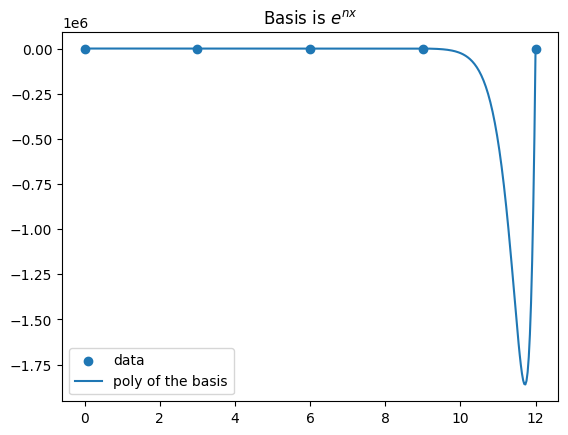

In [7]:
plt.scatter(nodes, values)
plt.plot(x_axis, basis_poly(x_axis, basis=lambda n, x: np.e ** (n * x)))
plt.title('Basis is $e^{n x}$')
plt.legend(['data', 'poly of the basis'])
plt.show()

Clearly the basis $ \dfrac{1}{n + 1 + x} $ describes the data the best.